# NLTK Tutorial 

Credit: 
- http://www.nltk.org
- https://likegeeks.com/nlp-tutorial-using-python-nltk/
- https://pythonspot.com/en/category/nltk/


In [2]:
# import packages 
import nltk 
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from bs4 import BeautifulSoup
import urllib.request 

In [3]:
from bs4 import BeautifulSoup
import urllib.request 

# download example text as an example 
url = 'http://www.textfiles.com/etext/FICTION/mobydick'
response = urllib.request.urlopen(url) 
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
print (text[:1000])

1851
                                   MOBY DICK;
                                  OR THE WHALE
                               by Herman Melville
ETYMOLOGY
  ETYMOLOGY
  (Supplied by a Late Consumptive Usher to a Grammar School)

  The pale Usher- threadbare in coat, heart, body, and brain; I see
him now. He was ever dusting his old lexicons and grammars, with a
queer handkerchief, mockingly embellished with all the gay flags of
all the known nations of the world. He loved to dust his old grammars;
it somehow mildly reminded him of his mortality.

  "While you take in hand to school others, and to teach them by
what name a whale-fish is to be called in our tongue leaving out,
through ignorance, the letter H, which almost alone maketh the
signification of the word, you deliver that which is not true."
                                                        HACKLUYT

  "WHALE. * * * Sw. and Dan. hval. This animal is named from roundness
or rolling; for in Dan. hvalt is arched or vaulte

In [7]:
# to save some time, truncate text 
text = text[:int(len(text)/10)]

In [30]:
import string
# remove punctuation
translator = str.maketrans('', '', string.punctuation)
# split into tokens 
text = text.translate(translator)

## Tokenization

In [93]:
# tokenize the text using pure python 
tokens = [t for t in text.split()] 
print(tokens[:10])

['1851', 'MOBY', 'DICK;', 'OR', 'THE', 'WHALE', 'by', 'Herman', 'Melville', 'ETYMOLOGY']


In [87]:
# tokenize the text using nltk tokenize method 
tokens = word_tokenize(text)
print(tokens[:10])

['1851', 'MOBY', 'DICK', ';', 'OR', 'THE', 'WHALE', 'by', 'Herman', 'Melville']


In [94]:
# compute the frequency of each tokens or words 
freq = nltk.FreqDist(tokens) 

# show top 10 most frequent words 
sorted(freq.items(), key=lambda x: x[1],reverse=True)[:10]

[('the', 6407),
 ('of', 3358),
 ('and', 2906),
 ('a', 2423),
 ('to', 2268),
 ('in', 1935),
 ('that', 1342),
 ('his', 1257),
 ('I', 1061),
 ('was', 840)]

In [ ]:
# to convert freq dict to pandas dataframe 
tmp = pd.DataFrame.from_dict(freq, orient='index').reset_index()
tmp.columns = ['word','c']
tmp.tail()

In [64]:
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))
    break 

1851:3


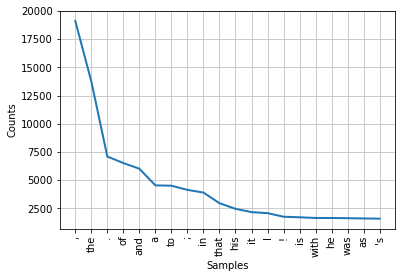

In [65]:
# plot top 20 most frequent words in a plot 
freq.plot(20, cumulative=False)

## Stopwords

In [69]:
from nltk.corpus import stopwords

# view stopwords 
print(stopwords.words('english')[:10])
print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']
153


In [99]:
clean_tokens = tokens.copy() # or tokens[:]
sr = stopwords.words('english')
for token in tokens:
    if token.lower() in stopwords.words('english'):
        clean_tokens.remove(token)
clean_tokens[:10]

['1851',
 'MOBY',
 'DICK;',
 'WHALE',
 'Herman',
 'Melville',
 'ETYMOLOGY',
 'ETYMOLOGY',
 '(Supplied',
 'Late']

In [100]:
# compute the frequency of each tokens or words 
freq = nltk.FreqDist(clean_tokens) 

# show top 10 most frequent words 
sorted(freq.items(), key=lambda x: x[1],reverse=True)[:10]

[('one', 346),
 ('upon', 279),
 ('like', 266),
 ('would', 228),
 ('old', 194),
 ('whale', 165),
 ('ye', 164),
 ('said', 158),
 ('though', 158),
 ('little', 154)]

## Word Stemming 
Word stemming means removing affixes from words and returning the root word.

In [102]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer() 
print(stemmer.stem('working'))
print(stemmer.stem('increases'))

work
increas


## Word Lemmatization
Word lemmatizing is similar to stemming, but the difference is the result of lemmatizing is a real word. Unlike stemming, when you try to stem some words, it will result in something like this:



In [103]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('increases'))

increase


## Ngrams

Returns the ngrams generated from a sequence of items, as an iterator.

In [17]:
from nltk import ngrams
from nltk import bigrams
from nltk import trigrams

In [15]:
# sixgram example
n = 6
sixgrams = ngrams(text.split(), n)
sixgrams

<generator object ngrams at 0x111b08e08>

In [16]:
n = 6
sixgrams = ngrams(text.split(), n)
list(sixgrams)[:10]

[('1851', 'MOBY', 'DICK;', 'OR', 'THE', 'WHALE'),
 ('MOBY', 'DICK;', 'OR', 'THE', 'WHALE', 'by'),
 ('DICK;', 'OR', 'THE', 'WHALE', 'by', 'Herman'),
 ('OR', 'THE', 'WHALE', 'by', 'Herman', 'Melville'),
 ('THE', 'WHALE', 'by', 'Herman', 'Melville', 'ETYMOLOGY'),
 ('WHALE', 'by', 'Herman', 'Melville', 'ETYMOLOGY', 'ETYMOLOGY'),
 ('by', 'Herman', 'Melville', 'ETYMOLOGY', 'ETYMOLOGY', '(Supplied'),
 ('Herman', 'Melville', 'ETYMOLOGY', 'ETYMOLOGY', '(Supplied', 'by'),
 ('Melville', 'ETYMOLOGY', 'ETYMOLOGY', '(Supplied', 'by', 'a'),
 ('ETYMOLOGY', 'ETYMOLOGY', '(Supplied', 'by', 'a', 'Late')]

In [20]:
# bigram
list(bigrams(text.split()))[:10]

[('1851', 'MOBY'),
 ('MOBY', 'DICK;'),
 ('DICK;', 'OR'),
 ('OR', 'THE'),
 ('THE', 'WHALE'),
 ('WHALE', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', 'ETYMOLOGY'),
 ('ETYMOLOGY', 'ETYMOLOGY')]

In [32]:
tokens = list(bigrams(text.split()))

# compute the frequency of each tokens or words 
freq = nltk.FreqDist(tokens) 

# show top 10 most frequent words 
sorted(freq.items(), key=lambda x: x[1],reverse=True)[:10]

[(('in', 'the'), 24),
 (('of', 'the'), 18),
 (('OF', 'THE'), 10),
 (('a', 'whale'), 10),
 (('to', 'the'), 9),
 (('the', 'sea'), 9),
 (('of', 'a'), 8),
 (('the', 'whale'), 8),
 (('by', 'a'), 7),
 (('is', 'a'), 6)]

In [33]:
tokens = list(trigrams(text.split()))

# compute the frequency of each tokens or words 
freq = nltk.FreqDist(tokens) 

# show top 10 most frequent words 
sorted(freq.items(), key=lambda x: x[1],reverse=True)[:10]

[(('in', 'the', 'sea'), 4),
 (('of', 'the', 'whale'), 4),
 (('by', 'a', 'whale'), 4),
 (('of', 'a', 'whale'), 3),
 (('a', 'whale', 'in'), 3),
 (('There', 'she', 'blows'), 3),
 (('Supplied', 'by', 'a'), 2),
 (('of', 'all', 'the'), 2),
 (('all', 'the', 'known'), 2),
 (('poor', 'devil', 'of'), 2)]